In [1]:
import pandas as pd
import numpy as np

from subprocess import call

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr as pcor

%matplotlib inline
sns.set_style('whitegrid')

## Functional genomic analysis
Here we will analyse the cell death associated signature from functional genomic aspect.

At first we will calculate gene expression - cell viability correlation coefficients form Achilles-L1000-96h (and also CTRP-L1000-24h) datasets.

In [38]:
#achilles data
sig_info=pd.read_table('../results/Achilles/sig_info_merged_lm.csv',
                      sep=',',header=0,index_col=[0])
signatures=pd.read_table('../results/Achilles/signatures_merged_lm.csv',
                        sep=',',header=0,index_col=[0])
fil=sig_info['pert_itime']=='96 h'
sig_info=sig_info[fil]
signatures=signatures.loc[sig_info.index]

In [39]:
#prepare a dataframe to store correlations
gene_info=pd.read_table('../data/LINCS/GSE92742/GSE92742_Broad_LINCS_gene_info.txt',
                       sep='\t',index_col=[0],header=0)
fil=gene_info['pr_is_lm']==1
gene_info=gene_info[fil]
gene_info.index=gene_info.index.astype(str)
correlations=pd.DataFrame(index=gene_info.index,
                           columns=['pr_gene_symbol','Pearson_r','p_val'])
correlations['pr_gene_symbol']=gene_info['pr_gene_symbol']

In [40]:
for gene_id in correlations.index:
    r,p=pcor(signatures[gene_id],sig_info['shRNA_abundance'])
    correlations.loc[gene_id,['Pearson_r','p_val']]=r,p
correlations.to_csv('../results/functional/achilles_cors_lm.csv')

In [41]:
#just looking into the gene - viaiblity correlations
correlations.sort_values('Pearson_r',ascending=False).head()

,pr_gene_symbol,Pearson_r,p_val
pr_gene_id,,,
890,CCNA2,0.342784,0
332,BIRC5,0.328564,0
7153,TOP2A,0.306413,0
11065,UBE2C,0.306173,0
983,CDK1,0.300557,0


In [42]:
# do the same analysis with ctrp
sig_info=pd.read_table('../results/CTRP/sig_info_merged_lm.csv',
                      sep=',',header=0,index_col=[0])
signatures=pd.read_table('../results/CTRP/signatures_merged_lm.csv',
                        sep=',',header=0,index_col=[0])
fil=sig_info['pert_itime']=='24 h'
sig_info=sig_info[fil]
signatures=signatures.loc[sig_info.index]
correlations=pd.DataFrame(index=gene_info.index,
                           columns=['pr_gene_symbol','Pearson_r','p_val'])
correlations['pr_gene_symbol']=gene_info['pr_gene_symbol']
for gene_id in correlations.index:
    r,p=pcor(signatures[gene_id],sig_info['cpd_avg_pv'])
    correlations.loc[gene_id,['Pearson_r','p_val']]=r,p
correlations.to_csv('../results/functional/ctrp_cors_lm.csv')

## Gene Ontology Enrichment
We perform Gene Ontology (Biological Process) enrichment with piano R package (*fgsea* method) using correlation values as gene level statistics. The enriched GO terms are related to cell death / prolifeation and inflamation process.

In [14]:
# Gene Ontology Enrichments
call(['Rscript','GO_BP_enrichments.R'])

0

In [18]:
#just look into GO results
data=pd.read_table('../results/functional/enrichments/GOBP_achilles.tsv',
                   sep='\t',header=0,index_col=[0])
data.sort_values('p adj (dist.dir.dn)').head(10)

,Name,Genes (tot),Stat (dist.dir),p (dist.dir.up),p adj (dist.dir.up),p (dist.dir.dn),p adj (dist.dir.dn),Genes (up),Genes (down)
1732,GO_REGULATION_OF_SECRETION,56,-0.48515,NaN,NaN,0.000192,0.02028,16,40
2054,GO_VASCULATURE_DEVELOPMENT,51,-0.50775,NaN,NaN,0.000194,0.02028,12,39
1880,GO_RESPONSE_TO_OXYGEN_CONTAINING_COMPOUND,162,-0.36686,NaN,NaN,0.000183,0.02028,58,104
184,GO_CELLULAR_RESPONSE_TO_ORGANIC_SUBSTANCE,193,-0.34273,NaN,NaN,0.000181,0.02028,66,127
1819,GO_RESPONSE_TO_BACTERIUM,55,-0.51211,NaN,NaN,0.000192,0.02028,15,40
497,GO_INFLAMMATORY_RESPONSE,41,-0.59845,NaN,NaN,0.000190,0.02028,6,35
1612,GO_REGULATION_OF_MULTICELLULAR_ORGANISMAL_DEVE...,160,-0.35962,NaN,NaN,0.000183,0.02028,57,103
287,GO_DEFENSE_RESPONSE,93,-0.47241,NaN,NaN,0.000188,0.02028,27,66
40,GO_ANATOMICAL_STRUCTURE_FORMATION_INVOLVED_IN_...,75,-0.50289,NaN,NaN,0.000189,0.02028,20,55
1840,GO_RESPONSE_TO_EXTERNAL_STIMULUS,159,-0.37962,NaN,NaN,0.000183,0.02028,60,99


## KEGG pathway enrichment
We also performed KEGG pathway enrichment analisis, similary to GO enrichment.

In [19]:
# KEGG pathway Enrichments
call(['Rscript','KEGG_enrichments.R'])

0

In [21]:
data=pd.read_table('../results/functional/enrichments/KEGG_achilles.tsv',
                   sep='\t',header=0,index_col=[0])
data.sort_values('p adj (dist.dir.dn)').head(10)

,Name,Genes (tot),Stat (dist.dir),p (dist.dir.up),p adj (dist.dir.up),p (dist.dir.dn),p adj (dist.dir.dn),Genes (up),Genes (down)
23,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,17,-0.73142,NaN,NaN,0.000193,0.006919,2,15
62,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,18,-0.67053,NaN,NaN,0.000195,0.006919,1,17
97,KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY,17,-0.62931,NaN,NaN,0.001741,0.041199,3,14
49,KEGG_INSULIN_SIGNALING_PATHWAY,28,-0.52477,NaN,NaN,0.002896,0.051400,9,19
8,KEGG_APOPTOSIS,23,-0.54688,NaN,NaN,0.003684,0.052317,7,16
16,KEGG_CALCIUM_SIGNALING_PATHWAY,20,-0.56626,NaN,NaN,0.004650,0.055028,6,14
43,KEGG_HEDGEHOG_SIGNALING_PATHWAY,6,-0.79044,NaN,NaN,0.007429,0.058608,0,6
73,KEGG_PATHWAYS_IN_CANCER,75,-0.36908,NaN,NaN,0.006781,0.058608,27,48
79,KEGG_PRION_DISEASES,9,-0.69820,NaN,NaN,0.006868,0.058608,1,8
15,KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY,19,-0.54774,NaN,NaN,0.009340,0.066316,3,16


## Transcription factor regulon enrichment
To infer Transcription Factors (TFs) activities - potentially having causal role in the observered gene expression changes - we performed TF regulon enrichment analysis. Regulons for TFs are already included in the repository, but can manually dowloaded from [DoRothEA repository](https://github.com/saezlab/DoRothEA).

In [44]:
# Transcription Factor regulon enrichment using DoRothEA and viper
call(['Rscript','TF_regulon_enrichments.R'])

0

In [45]:
# we remove low confidence level TFs from enrichment results (C,D and E)
data=pd.read_table('../results/functional/enrichments/DoRothEA.csv',
                  sep=',',header=0,index_col=[0])
tf_names=pd.Series(data.index).apply(lambda x:x.split('_')[0]).values
good_msk=pd.Series(data.index).apply(lambda x:x.split('_')[1][0] in ['A','B']).values
data.index=tf_names
data=data[good_msk]
data.columns=['NES']

In [46]:
data.to_csv('../results/functional/enrichments/DoRothEA.csv')
print(data.sort_values('NES'))

             NES
FOXO3  -3.816854
PRDM14 -3.440174
ESR2   -2.888764
POU2F1 -2.772940
TP53   -2.701049
USF2   -2.554411
STAT1  -2.442873
FOS    -2.313918
ETS1   -2.248835
JUN    -2.153735
ESR1   -1.969761
SPI1   -1.950526
SMAD4  -1.942263
TWIST1 -1.937114
FOXO1  -1.922666
SMAD3  -1.901023
FOXO4  -1.836478
TFAP2A -1.746101
ETV4   -1.743225
FLI1   -1.582792
SOX2   -1.581124
ATF2   -1.571681
AR     -1.498928
KLF4   -1.479860
USF1   -1.413601
VDR    -1.411384
HIF1A  -1.381960
PAX8   -1.331544
CTCF   -1.326600
ATF4   -1.325524
...          ...
CREB1  -0.429856
MYB    -0.287150
FOXL2  -0.286375
SREBF1 -0.276869
RELA   -0.213521
STAT3  -0.149852
WT1    -0.081892
RARA   -0.008986
FOXP1   0.014709
ELK1    0.103107
SP1     0.127504
CEBPD   0.134245
HNF4A   0.218703
ZNF263  0.450042
STAT5A  0.451467
TFAP2C  0.461781
ETS2    0.795876
E2F3    1.058977
TCF7L2  1.080351
FOXA1   1.217310
YY1     1.519722
SREBF2  1.527549
BACH1   1.759120
MYC     1.821395
ATF1    1.863959
FOXM1   2.468741
TFDP1   3.0689

We also compared these results with average gene essentialities of TF genes (from project Achilles). Our hypotesis was that as TFs can be the causal factors behind cell death / proliferation related gene expression changes, so TF activity changes and gene essentialities should correlate.

In [55]:
gene_dep=pd.read_table('../data/Achilles/D2_combined_gene_dep_scores.csv',sep=',',
                      header=0,index_col=[0])
genes=pd.Series(gene_dep.index).apply(lambda x :x.split(' (')[0])
gene_dep.index=genes
gene_dep=pd.DataFrame(np.mean(gene_dep,1),columns=['Mean gene essentiality'])

In [59]:
tfs=list(set(gene_dep.index) & set(data.index))

print('Correlation between activity and essentiality of transcription factors: r=%f p=%f' %
      pcor(data.loc[tfs,'NES'],gene_dep.loc[tfs,'Mean gene essentiality']))

Correlation between activity and essentiality of transcription factors: r=-0.322410 p=0.005087


## Signaling pathway footrpint analysis (PROGENy)
We also calculated pathway activity changes associated with cell death / proliferation. For this we used PROGENy framework. Model matrix for PROGENy is already included in the repository, but can manually dowloaded from [PROGENy repository](https://github.com/saezlab/progeny)

In [30]:
# for PROGENy we have low overlap between landmark and PROGENY genes
# so we use bing gene - cell viability correlations
# to calculate this, you have to re-run a first part of this
# notebook with bing genes: replacing fil=gene_info['pr_is_lm']==1
# to fil=gene_info['pr_is_bing']==1 in second cell (and renaming output files *_bing.*)
correlations=pd.read_table('../results/functional/achilles_cors_bing.csv',
                          sep=',',header=0,index_col=[0])
progeny=pd.read_table('../data/Functional/PROGENy.csv',
                     sep=',',header=0,index_col=[0])
correlations.index=correlations['pr_gene_symbol']
correlations=pd.DataFrame(correlations['Pearson_r'])

In [31]:
genes=list(set(progeny.index)&set(correlations.index))
print(len(genes))

898


In [32]:
scores=pd.DataFrame(index=range(1001),columns=progeny.columns)
#first real pathway activity
scores.loc[0]=np.dot(correlations.loc[genes].T,progeny.loc[genes])
# than 1000 random permutation of genes in correlations
np.random.seed(19890904)
for i in range(1,1001):
    correlations.index=np.random.choice(correlations.index,len(correlations.index),False)
    scores.loc[i]=np.dot(correlations.loc[genes].T,progeny.loc[genes])

In [33]:
scores=((scores-np.mean(scores.iloc[1:],0))/np.std(scores.iloc[1:],0)).loc[0]
scores=pd.DataFrame(scores)
scores.columns=['Pathway activity']

In [34]:
scores.to_csv('../results/functional/enrichments/PROGENy.csv')
print(scores)

         Pathway activity
EGFR              2.94481
Hypoxia           2.29985
JAK-STAT         -3.26629
MAPK              4.33919
NFkB             -1.26535
PI3K               2.9206
TGFb             -1.38173
TNFa             -1.18426
Trail            0.914288
VEGF              0.33155
p53              -1.99774
Androgen          1.53871
Estrogen          2.36513
WNT              -1.76168


## Association with drug sensitivity
We will calculte the "cell viability signature score" for the cancer cell lines in the GDSC panel, and see that this score is associated with drug sensitivity. We calculate "cell viaiblity signature score" by predicting cell viaiblity (using Achilles model) from the baseline gene expression of GDSC cell lines.

In [60]:
# translating gene ids
call(['Rscript','gene_translate.R'])

0

In [3]:
expression=pd.read_table('../data/GDSC/sanger1018_brainarray_ensemblgene_rma.txt',
                        sep='\t',header=0,index_col=[0])
gene_anno=pd.read_table('../data/GDSC/ensembl_hgnc.csv',sep=',',header=0,index_col=[0])
# remove not 1on1 translations and NaNs
gene_anno=gene_anno.drop_duplicates('ensembl_gene_id')
gene_anno=gene_anno.drop_duplicates('hgnc_symbol')
msk=np.sum(pd.isnull(gene_anno),1)==0
gene_anno=gene_anno[msk]
# translate gdsc gene ids gene symbol
gene_anno.index=gene_anno['ensembl_gene_id']
gene_anno=gene_anno['hgnc_symbol']
genes=list(set(gene_anno.index)&set(expression.index))
expression=expression.loc[genes]
gene_anno=gene_anno[genes]
expression.index=gene_anno.values
expression.to_csv('../data/GDSC/gex.csv',sep=',')
# also normalising the gene expression
expression_norm=((expression.T-np.mean(expression,1))/np.std(expression,1)).T
expression_norm.to_csv('../data/GDSC/gex_norm.csv',sep=',')

In [61]:
expression_norm=pd.read_table('../data/GDSC/gex_norm.csv',sep=',',header=0,index_col=[0])

In [9]:
# now let's calculate "cell viability signature score"
model=pd.read_table('../results/model/final_models/ctrp_single.csv',sep=',',
                   header=0,index_col=[0])
model.index=model['pr_gene_symbol']
model=pd.DataFrame(model['coef'])
genes=list(set(model.index) & set(expression_norm.index))
print('We have %i common genes between cancer cell lines and LINCS models.' % len(genes))

We have 907 common genes between cancer cell lines and LINCS models.


In [10]:
score=pd.DataFrame(np.dot(expression_norm.loc[genes].T,model.loc[genes]),
             index=expression_norm.columns,columns=['Signature_score'])
score.index.name='COSMIC'
score.to_csv('../results/functional/gdsc_scores.csv',sep=',')

In [163]:
cell_anno=pd.read_excel('../data/GDSC/Cell_Lines_Details.xlsx').iloc[:-1,:]
cell_anno['COSMIC identifier']=cell_anno['COSMIC identifier'].astype(int).astype(str)
cell_anno.index=cell_anno['COSMIC identifier']
score['TCGA']=cell_anno.loc[score.index,'Cancer Type\n(matching TCGA label)']
score['GDSC']=cell_anno.loc[score.index,'GDSC\nTissue descriptor 1']

In [164]:
cell_anno.columns

Index(['Sample Name', 'COSMIC identifier', 'Whole Exome Sequencing (WES)',
       'Copy Number Alterations (CNA)', 'Gene Expression', 'Methylation',
       'Drug\nResponse', 'GDSC\nTissue descriptor 1',
       'GDSC\nTissue\ndescriptor 2', 'Cancer Type\n(matching TCGA label)',
       'Microsatellite \ninstability Status (MSI)', 'Screen Medium',
       'Growth Properties'],
      dtype='object')

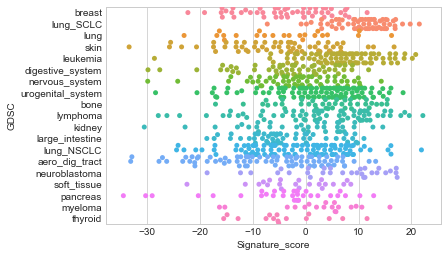

In [165]:
sns.swarmplot(x='Signature_score',y='GDSC',data=score)
plt.savefig('proba.pdf')

We will compare this signature score with different other things, like cell division rate, general drug sensitivity and drug specific sensitivity. For cell division rate, we need to download **DS1.zip** from [Hafner et al, Scientific Data 2017](https://datadryad.org/resource/doi:10.5061/dryad.03n60). **DS1_datafile.xls** goes to *'../data/GDSC/*.

In [167]:
growth=pd.read_excel('../data/GDSC/DS1_datafile.xlsx')
growth=growth.drop_duplicates(['Biological Replicate ID','Cell Name'])
growth=growth.groupby('Cell Name').median()
growth=growth['Nominal Division Rate']
#we get COSMIC IDs for these cell lines
cell_anno=pd.read_excel('../data/GDSC/Cell_Lines_Details.xlsx')
cell_anno.index=cell_anno['Sample Name']
cells=list(set(growth.index)&set(cell_anno.index))
growth=growth[cells]
cell_anno=cell_anno.loc[cells]
growth.index=cell_anno['COSMIC identifier'].astype(int).astype(str)
growth=pd.DataFrame(growth)
growth.to_csv('../results/functional/gdsc_division.csv')

In [198]:
growth=pd.read_excel('../data/GDSC/DS1_datafile.xlsx')

In [199]:
growth=growth.drop_duplicates(['Biological Replicate ID','Cell Name'])
growth['Division time']=1/growth['Nominal Division Rate']
growth=growth.groupby('Cell Name').mean()
growth=growth['Division time']
cell_anno=pd.read_excel('../data/GDSC/Cell_Lines_Details.xlsx')
cell_anno.index=cell_anno['Sample Name']
cells=list(set(growth.index)&set(cell_anno.index))
growth=growth[cells]
cell_anno=cell_anno.loc[cells]
growth.index=cell_anno['COSMIC identifier'].astype(int).astype(str)
growth=pd.DataFrame(growth)
growth.to_csv('../results/functional/gdsc_division.csv')

In [200]:
growth

,Division time
COSMIC identifier,
905960,0.458989
910852,1.274240
908120,1.654718
907046,0.675637
910910,1.549195
924106,0.590757
749709,0.655539
749714,0.833735
909778,1.853844


In [201]:
scores=pd.read_table('../results/functional/gdsc_scores.csv',sep=',',
                    header=0,index_col=[0])
scores.index=scores.index.astype(int).astype(str)

In [202]:
cosmics=list(set(scores.index)&set(growth.index))

In [170]:
scores=pd.DataFrame(np.dot(expression_norm.loc[genes].T,model.loc[genes]),
             index=expression_norm.columns,columns=['Signature_score'])
scores.index.name='COSMIC'

In [196]:
scores.sort_values('Signature_score')

,Signature_score
COSMIC,
1240151,-2.037650
906746,-1.889931
753531,-1.769090
1240219,-1.747075
1298358,-1.677803
1240161,-1.676253
1240184,-1.647301
910702,-1.631774
906868,-1.600895


Pearson correlation: 0.300840 p value: 0.079072


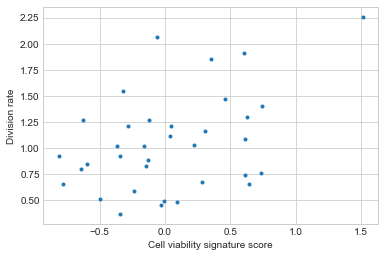

In [203]:
plt.plot(scores.loc[cosmics],growth.loc[cosmics],'.')
plt.xlabel('Cell viability signature score')
plt.ylabel('Division rate')
r,p=scor(scores.loc[cosmics],growth.loc[cosmics])
print('Pearson correlation: %f p value: %f' % (r,p))

## Associations with general sensitivity

In [130]:
scores=pd.read_table('../results/functional/gdsc_scores.csv',sep=',',
                    header=0,index_col=None)
scores.head()

,COSMIC,Signature_score
0,906826.0,-0.008742
1,687983.0,-0.002016
2,910927.0,0.252946
3,1240138.0,-0.553885
4,1240139.0,0.573571


In [131]:
scores['COSMIC']=scores['COSMIC'].astype(int).astype(str)
scores=scores.drop_duplicates('COSMIC')
scores.index=scores['COSMIC']
scores=pd.DataFrame(scores['Signature_score'])
scores.head()

,Signature_score
COSMIC,
906826,-0.008742
687983,-0.002016
910927,0.252946
1240138,-0.553885
1240139,0.573571


In [14]:
drug_response=pd.read_excel('../data/GDSC/v17.3_fitted_dose_response.xlsx')

In [132]:
drug_response.head()

,DATASET_VERSION,IC50_RESULTS_ID,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
0,17.3,1,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505
1,17.3,1482,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999
2,17.3,1791,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170
3,17.3,2177,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971
4,17.3,2754,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832


In [133]:
drugs=drug_response['DRUG_ID'].value_counts().index[:50]
cells=drug_response['COSMIC_ID'].value_counts().index[:200]
fil=np.in1d(drug_response['DRUG_ID'],drugs)&np.in1d(drug_response['COSMIC_ID'],cells)

In [134]:
drug_response_gb=drug_response[['COSMIC_ID','LN_IC50','AUC']]

In [135]:
median_response=drug_response_gb.groupby('COSMIC_ID').median()
median_response.index=median_response.index.astype(str)

In [136]:
from scipy.stats import spearmanr as scor

(-0.016708225986585293, 0.60082104143371629)

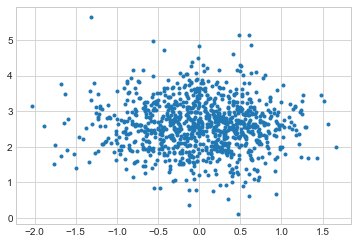

In [137]:
cells=list(set(scores.index)&set(median_response.index))
plt.plot(scores.loc[cells,'Signature_score'],median_response.loc[cells,'LN_IC50'],'.')
pcor(scores.loc[cells,'Signature_score'],median_response.loc[cells,'LN_IC50'])

In [138]:
anno=pd.read_excel('../data/GDSC/Cell_Lines_Details.xlsx').iloc[:-1,:]
anno['COSMIC identifier']=anno['COSMIC identifier'].astype(int).astype(str)
anno.index=anno['COSMIC identifier']

In [139]:
cosmics=list(set(scores.index)&set(anno.index))
scores=scores.loc[cosmics]
anno=anno.loc[cosmics]
anno['SCORE']=scores['Signature_score']

In [317]:
fil=~pd.isnull(anno['Cancer Type\n(matching TCGA label)'])
anno=anno[fil]
fil=~pd.isnull(anno['Microsatellite \ninstability Status (MSI)'])
anno=anno[fil]

In [318]:
drug_response=pd.read_excel('../data/GDSC/v17.3_fitted_dose_response.xlsx')

In [319]:
drug_response['COSMIC_ID']=drug_response['COSMIC_ID'].astype(int).astype(str)

In [320]:
fil=np.in1d(drug_response['COSMIC_ID'],anno.index)
drug_response=drug_response[fil]

In [361]:
results=pd.DataFrame(index=list(set(drug_response['DRUG_ID'])),columns=['pval','coef'])

In [362]:
import statsmodels.formula.api as smf

In [420]:
for d in results.index:
    fil=drug_response['DRUG_ID']==d
    temp=drug_response[fil][['COSMIC_ID','LN_IC50']].copy()
    temp['INTERCEPT']=1
    temp['SCORE']=anno.loc[temp['COSMIC_ID'].values,'SCORE'].values
    temp['SCORE']=expression_norm.loc['EDNRA',temp['COSMIC_ID'].values].values
    temp['MSI']=anno.loc[temp['COSMIC_ID'].values,'Microsatellite \ninstability Status (MSI)'].values
    temp['TCGA']=anno.loc[temp['COSMIC_ID'].values,'Cancer Type\n(matching TCGA label)'].values
    model=smf.ols('LN_IC50 ~ MSI + TCGA + SCORE',data=temp)
    res=model.fit()
    results.loc[d]=(res.pvalues['SCORE'],res.params['SCORE'])

In [421]:
results.sort_values('pval')

,pval,coef
197,0.00390519,0.126284
238,0.0074867,-0.135853
111,0.0102405,0.20046
283,0.0140108,-0.195538
223,0.0235039,-0.159293
53,0.0314832,0.218052
225,0.0343077,-0.155561
1373,0.0368955,-0.167013
211,0.0369148,-0.10423
281,0.037782,-0.0886481


In [417]:
np.sum(results['pval']<0.05)

28

In [219]:
results_new=results.copy()

In [203]:
results_old=results.copy()

In [374]:
results.sort_values('pval')

,pval,coef
1378,5.28858e-05,-0.320305
1259,6.91472e-05,-0.302102
1242,0.000305931,-0.202165
1175,0.000328048,-0.14805
1494,0.000890665,-0.218828
1149,0.00142307,-0.159943
326,0.00269645,0.196361
196,0.0033127,0.212796
1495,0.00443787,-0.124347
1373,0.00466304,-0.207632


In [234]:
results_new.loc[341]

pval    0.000306889
coef    -0.00921033
Name: 341, dtype: object

In [339]:
d=AKAP12
fil=drug_response['DRUG_ID']==d
temp=drug_response[fil][['COSMIC_ID','LN_IC50']].copy()
temp['INTERCEPT']=1
temp['SCORE']=anno.loc[temp['COSMIC_ID'].values,'SCORE'].values
temp['MSI']=anno.loc[temp['COSMIC_ID'].values,'Microsatellite \ninstability Status (MSI)'].values
temp['TCGA']=anno.loc[temp['COSMIC_ID'].values,'Cancer Type\n(matching TCGA label)'].values

In [340]:
temp.head()

,COSMIC_ID,LN_IC50,INTERCEPT,SCORE,MSI,TCGA
139658,683665,2.811860,1,0.363828,MSS/MSI-L,MM
139659,683667,1.758599,1,1.030549,MSS/MSI-L,MB
139664,684681,3.564697,1,-0.164216,MSS/MSI-L,LUAD
139665,687452,1.523128,1,0.559493,MSS/MSI-L,BLCA
139666,687455,2.725884,1,-0.854244,MSS/MSI-L,BLCA


In [341]:
pcor(temp['LN_IC50'],temp['SCORE'])

(-0.12561078542168674, 0.0010557364118067253)

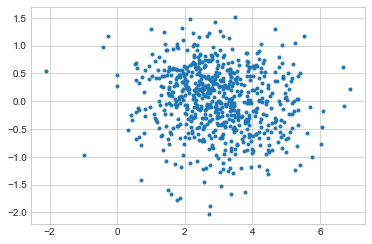

In [342]:
plt.plot(temp['LN_IC50'],temp['SCORE'],'.')

In [343]:
expression_norm.head()

COSMIC,1240121,687798,909749,924241,949088,907323,908473,906823,906855,908148,...,1298160,907062,909974,909707,949174,1290771,905944,909696,687600,907175
MAPKBP1,2.045903,-0.342786,-0.900490,-0.841896,0.905934,4.132497,-0.238930,0.667608,-0.322160,-0.623134,...,0.777924,0.786097,-0.465334,1.171143,-0.319630,-0.922107,0.163616,-0.920691,0.118476,0.358289
NAA16,-0.336631,0.213259,-0.986189,1.416113,1.212747,-0.084237,-1.407935,-0.347849,1.988223,-0.202176,...,-0.383898,0.355232,-1.231169,2.657837,-0.263013,-0.048625,-0.104254,0.571590,-0.115587,0.872575
TSGA10,-0.168941,-0.091538,-0.127066,-0.362600,-0.345676,0.044570,0.866156,-1.154278,0.958606,0.147871,...,0.117882,-0.699827,-0.764553,0.693161,0.086022,-0.100636,0.510711,-0.506063,-0.127568,0.259898
AKAP12,-0.279453,-1.159006,0.685869,0.630733,0.971386,-1.090021,1.094084,0.467540,-1.313330,-1.300887,...,1.236581,-0.412917,1.317450,0.323258,1.088541,-1.271783,1.204091,1.709218,-1.168889,-0.324660
CHIA,0.622128,1.555004,-0.448535,-1.328638,0.650449,1.332589,-0.210043,-0.908112,0.032116,0.517851,...,1.683576,0.471724,1.307859,-0.025804,-0.120369,0.341966,0.133810,-0.975285,-0.012217,2.188192


In [358]:
expression_norm.index

Index(['MAPKBP1', 'NAA16', 'TSGA10', 'AKAP12', 'CHIA', 'FAM71A', 'AGPAT1',
       'PCSK7', 'CCDC84', 'OR4K13',
       ...
       'PDLIM7', 'BTN1A1', 'CTDSPL2', 'TMEM64', 'LDAH', 'DUOXA2', 'HLA-DPB2',
       'TMEM171', 'MAN1B1', 'LINC01565'],
      dtype='object', length=17335)

In [350]:
drug_response=pd.read_excel('../data/GDSC/v17.3_fitted_dose_response.xlsx')

In [365]:
drugs=drug_response['DRUG_ID'].value_counts().index[:50]

In [363]:
cells=drug_response['COSMIC_ID'].value_counts().index[:100]

Int64Index([ 910948,  684681,  908445,  906838, 1330943,  910692,  907795,
             688014,  753555,  946356,  907282, 1297439,  908149,  909713,
             910944,  735784,  684057,  910861,  908159, 1331032, 1327766,
             917486,  753579,  753621, 1295741,  687600,  907791,  907279,
             905955,  753595,  905982, 1290455,  687983,  687568,  908483,
             906861,  688023,  688006, 1240181,  949176,  909723,  971773,
             906872,  905940,  724872,  684062, 1297449,  684059,  687804,
             908143,  753623,  909773,  905990,  753599,  909250, 1330984,
             907172,  687562,  908469, 1323913,  946368,  906794,  949170,
             908457, 1330972, 1297446,  908467,  910691,  749715,  946353,
             724863, 1240128,  949163,  910780,  908449,  907322, 1330983,
             753618,  749716,  909975,  949165,  909702,  905941,  909256,
             906877,  753620,  906862,  910544,  905986,  910905,  909754,
             909698,  924